## NLTK 자연어 처리 패키지

- NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다. 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용된다.

- NLTK 패키지가 제공하는 주요 기능은 다음과 같다.
    - 말뭉치
    - 토큰 생성
    - 형태소 분석
    - 품사 태깅

### 말뭉치
- 말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합
- 단순히 소설, 신문 등의 문서를 모아놓은 것도 있지만 품사, 형태소 등의 보조적 의미를 추가하고 쉬운 분석을 위해 구조적인 형태로 정리해 놓은 것을 포함한다.
- NLTK 패키지의 corpus 서브패키지에서는 다양한 연구용 말뭉치를 제공한다.
- 이 목록은 전체 corpus의 일부일 뿐이다.
- 말뭉치 자료는 설치 시에 제공되지 않고 download 명령으로 사용자가 다운로드 받아야 한다.
- nltk.download("book") 명령을 실행하면 NLTK 패키지 사용자 설명서에서 요구하는 대부분의 말뭉치를 다운로드 받아준다.

In [1]:
import nltk

In [3]:
nltk.download("book", quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [10]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

## 토큰 생성
- 자연어 문서를 분석하기 위해서는 우선 긴 문자열을 분석을 위한 작은 단위로 나누어야 한다.
- 영문의 경우에는 문장, 단어 등을 토큰으로 사용하거나 정규 표현식을 할 수 있다.
- 문자열을 토큰으로 분리하는 함수를 토큰 생성 함수(tokenizer)라고 한다.
- 토큰 생성 함수는 문자열을 입력받아 토큰 문자열의 리스트를 출력한다.

In [11]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [12]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [14]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 형태소 분석

## 어간 추출과 원형 복원

In [17]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [18]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

## 품사 부착

In [19]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [20]:
nltk.help.upenn_tagset("TO")

TO: "to" as preposition or infinitive marker
    to


In [22]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [23]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['refuse', 'permit']

In [24]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

## Text 클래스

In [29]:
from nltk import Text

text = Text(retokenize.tokenize(emma_raw))
for t in text:
    print(t)

Emma
by
Jane
Austen
1816
VOLUME
I
CHAPTER
I
Emma
Woodhouse
handsome
clever
and
rich
with
a
comfortable
home
and
happy
disposition
seemed
to
unite
some
of
the
best
blessings
of
existence
and
had
lived
nearly
twenty
one
years
in
the
world
with
very
little
to
distress
or
vex
her
She
was
the
youngest
of
the
two
daughters
of
a
most
affectionate
indulgent
father
and
had
in
consequence
of
her
sister
s
marriage
been
mistress
of
his
house
from
a
very
early
period
Her
mother
had
died
too
long
ago
for
her
to
have
more
than
an
indistinct
remembrance
of
her
caresses
and
her
place
had
been
supplied
by
an
excellent
woman
as
governess
who
had
fallen
little
short
of
a
mother
in
affection
Sixteen
years
had
Miss
Taylor
been
in
Mr
Woodhouse
s
family
less
as
a
governess
than
a
friend
very
fond
of
both
daughters
but
particularly
of
Emma
Between
_them_
it
was
more
the
intimacy
of
sisters
Even
before
Miss
Taylor
had
ceased
to
hold
the
nominal
office
of
governess
the
mildness
of
her
temper
had
hardly
allowed
h

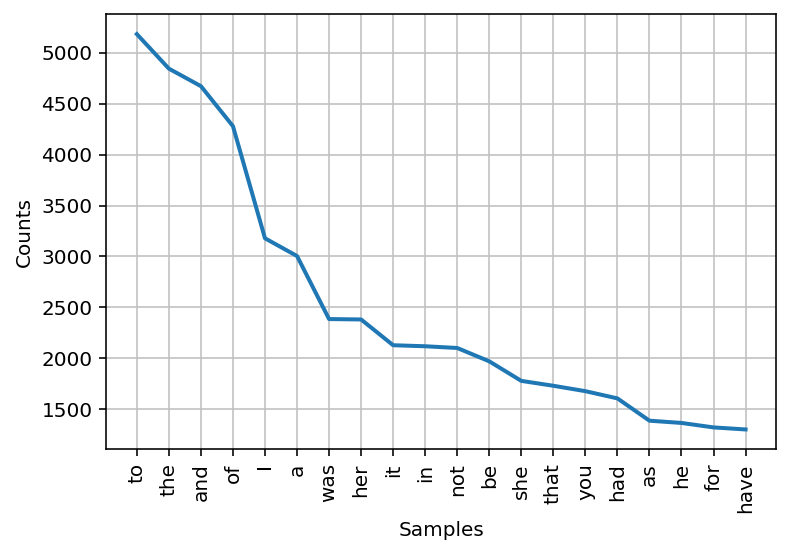

In [28]:
import matplotlib.pyplot as plt
text.plot(20)
plt.show()

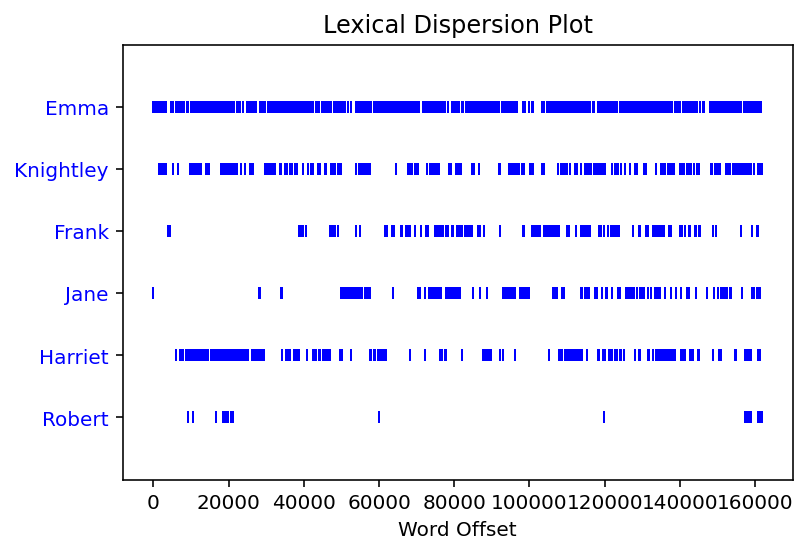

In [31]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [32]:
text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [33]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [34]:
text.common_contexts(["Emma", "she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


## FreqDist

In [35]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [38]:
from nltk import FreqDist

stopwords = {"Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"}
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)
fd_names

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [40]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [41]:
fd_names.most_common(20)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208),
 ('Hartfield', 160),
 ('Oh', 156),
 ('Bates', 141),
 ('Highbury', 123),
 ('John', 90),
 ('Randalls', 89),
 ('Smith', 89),
 ('Martin', 85),
 ('No', 79),
 ('Perry', 79)]

## 워드클라우드

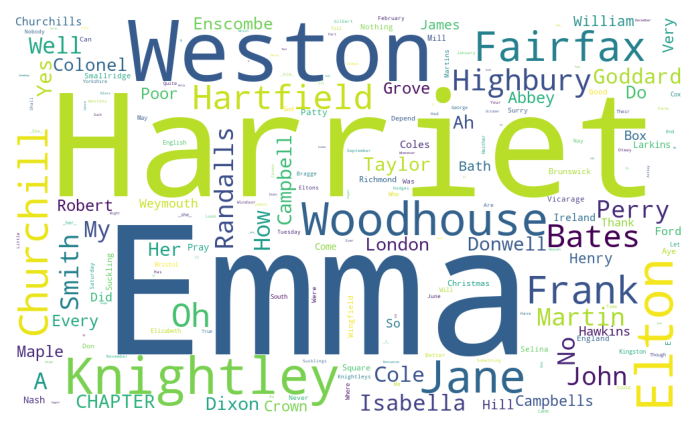

In [43]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()